 # Robust Embeddings

## Validation curves

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [100]:
ROLASER_MODELS = ["roberta-maxpool", "roberta-maxpool-init", "roberta-meanpool", "roberta-meanpool-init"]
C_ROLASER_MODELS = ["c-roberta-maxpool", "c-roberta-maxpool-init", "c-roberta-meanpool", "c-roberta-meanpool-init"]

In [101]:
COLUMNS = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]

In [102]:
input_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores"
all_scores = pd.read_csv(os.path.join(input_dir, "all_scores.csv")).sort_values(by="steps")

In [103]:
all_scores["model"].unique().size

2

In [104]:
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((5, 5))  # Set the exponent range to (5, 5)


KeyboardInterrupt: 

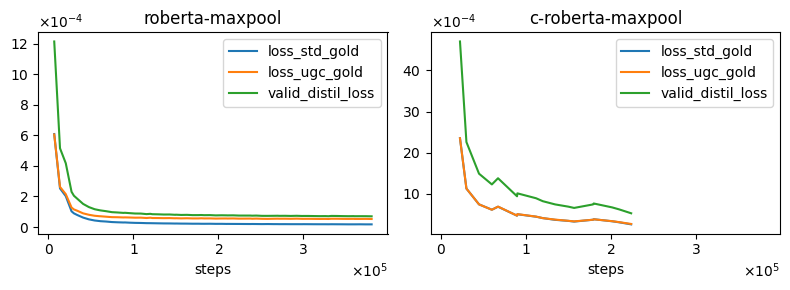

In [105]:
models = all_scores["model"].unique()

n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=COLUMNS, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()
plt.savefig(os.path.join(input_dir, "models_valid.png"))
plt.savefig(os.path.join(input_dir, "models_valid.pdf"))

## LASER metrics analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Cosine distance

In [ ]:
cosine_distances = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/cosine_distance_matrix.csv")
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="average"]
cosine_distances = cosine_distances[cosine_distances["src-tgt"]!="eng_Latn-eng_Latn"]
cosine_distances

,Unnamed: 0,dataset,src-tgt,cosdist,nbex
0,0,flores200,ace_Arab-eng_Latn,0.455130,1012
1,1,flores200,ace_Latn-eng_Latn,0.348420,1012
2,2,flores200,acm_Arab-eng_Latn,0.134560,1012
3,3,flores200,acq_Arab-eng_Latn,0.125026,1012
4,4,flores200,aeb_Arab-eng_Latn,0.160731,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,0.206195,1012
199,199,flores200,zho_Hans-eng_Latn,0.150216,1012
200,200,flores200,zho_Hant-eng_Latn,0.210406,1012
201,201,flores200,zsm_Latn-eng_Latn,0.103942,1012


<AxesSubplot: >

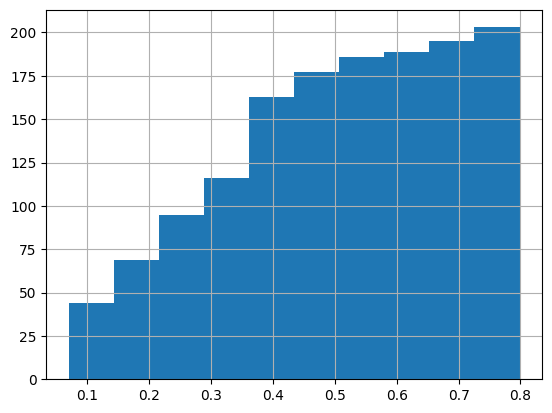

In [ ]:
cosine_distances['cosdist'].hist(cumulative=True)

<AxesSubplot: ylabel='Density'>

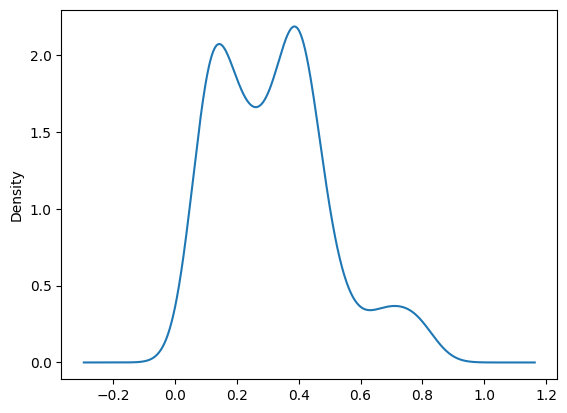

In [ ]:
cosine_distances['cosdist'].plot.density()

<AxesSubplot: >

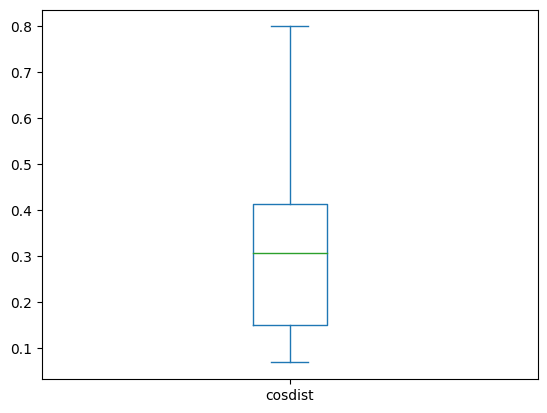

In [ ]:
cosine_distances['cosdist'].plot.box()

In [ ]:
cosine_distances_quantiles = cosine_distances['cosdist'].describe(percentiles=[x/100 for x in range(0,101,5)])


In [ ]:
cosine_distances_quantiles

count    203.000000
mean       0.317085
std        0.178869
min        0.069671
0%         0.069671
5%         0.095558
10%        0.106441
15%        0.117595
20%        0.130967
25%        0.151202
30%        0.183997
35%        0.218698
40%        0.249793
45%        0.284499
50%        0.308165
55%        0.353173
60%        0.376368
65%        0.388125
70%        0.399638
75%        0.414037
80%        0.430705
85%        0.458284
90%        0.528894
95%        0.686873
100%       0.798508
max        0.798508
Name: cosdist, dtype: float64

### xSIM

In [ ]:
xsim_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/_scores/xsim_matrix.csv")
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="average"]
xsim_scores = xsim_scores[xsim_scores["src-tgt"]!="eng_Latn-eng_Latn"]
xsim_scores

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,flores200,ace_Arab-eng_Latn,95.16,1012
1,1,flores200,ace_Latn-eng_Latn,65.51,1012
2,2,flores200,acm_Arab-eng_Latn,0.20,1012
3,3,flores200,acq_Arab-eng_Latn,0.00,1012
4,4,flores200,aeb_Arab-eng_Latn,0.99,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,4.05,1012
199,199,flores200,zho_Hans-eng_Latn,0.00,1012
200,200,flores200,zho_Hant-eng_Latn,4.05,1012
201,201,flores200,zsm_Latn-eng_Latn,0.30,1012


<AxesSubplot: ylabel='Frequency'>

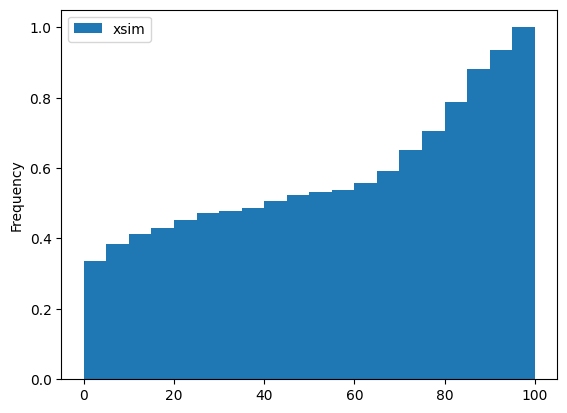

In [ ]:
xsim_scores.plot.hist(column=['xsim'],cumulative=True, bins=range(0,101,5), density=True)

<AxesSubplot: ylabel='Density'>

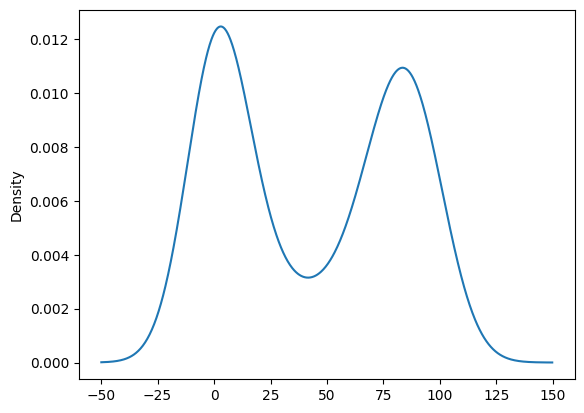

In [ ]:
xsim_scores['xsim'].plot.density()

<AxesSubplot: >

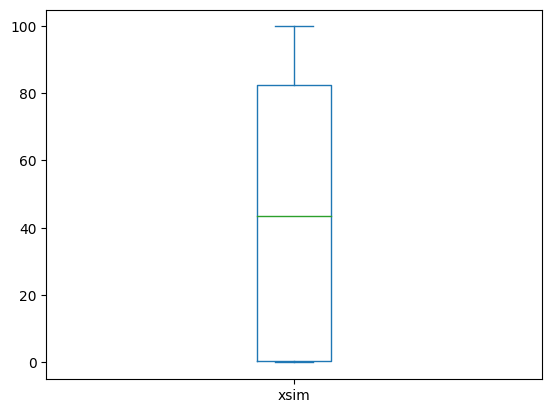

In [ ]:
xsim_scores['xsim'].plot.box()

In [ ]:
xsim_scores['xsim'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      43.417389
std       38.890398
min        0.000000
0%         0.000000
5%         0.000000
10%        0.000000
15%        0.000000
20%        0.200000
25%        0.400000
30%        0.950000
35%        6.636000
40%       13.120000
45%       24.431000
50%       43.480000
55%       61.780000
60%       70.550000
65%       74.790000
70%       79.390000
75%       82.510000
80%       85.690000
85%       88.620000
90%       91.580000
95%       95.611000
100%      99.800000
max       99.800000
Name: xsim, dtype: float64

In [ ]:
cosine_distances['cosdist'].quantile(.25)

0.1512024328112602

### xSIM++

In [ ]:
xsimpp_scores = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsimplusplus/_scores/xsimpp_matrix.csv")
xsimpp_scores = xsimpp_scores[xsimpp_scores["src-tgt"]!="average"]
xsimpp_scores

,Unnamed: 0,dataset,src-tgt,xsim(++),nbex
0,0,flores200,ace_Arab-eng_Latn,99.90,1012
1,1,flores200,ace_Latn-eng_Latn,93.48,1012
2,2,flores200,acm_Arab-eng_Latn,26.88,1012
3,3,flores200,acq_Arab-eng_Latn,23.62,1012
4,4,flores200,aeb_Arab-eng_Latn,36.86,1012
...,...,...,...,...,...
198,198,flores200,yue_Hant-eng_Latn,44.17,1012
199,199,flores200,zho_Hans-eng_Latn,25.99,1012
200,200,flores200,zho_Hant-eng_Latn,49.01,1012
201,201,flores200,zsm_Latn-eng_Latn,11.96,1012


In [ ]:
xsimpp_scores['xsim(++)'].describe(percentiles=set([x/100 for x in range(0,101,5)]))

count    203.000000
mean      67.147143
std       34.815017
min        7.210000
0%         7.210000
5%        10.970000
10%       13.280000
15%       17.084000
20%       21.816000
25%       27.420000
30%       36.344000
35%       54.316000
40%       66.914000
45%       75.741000
50%       86.560000
55%       93.480000
60%       95.358000
65%       96.670000
70%       97.170000
75%       97.780000
80%       98.280000
85%       98.910000
90%       99.310000
95%       99.600000
100%     100.000000
max      100.000000
Name: xsim(++), dtype: float64

### Quantiles

In [ ]:
quantiles = [
    {
        "quantile": x,
        "cosdist": cosine_distances['cosdist'].quantile(x/100),
        "xsim": xsim_scores['xsim'].quantile(x/100),
        "xsim++": xsimpp_scores['xsim(++)'].quantile(x/100),
    } for x in range(0,101,5)
]

In [ ]:
quantiles_df = pd.DataFrame(quantiles)
quantiles_df.to_csv("/home/lnishimw/scratch/LASER/tasks/_scores/all_quantiles.csv")

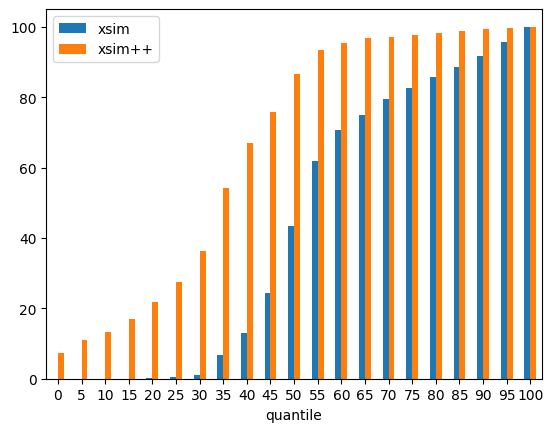

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['xsim', 'xsim++'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/xsim_xsimpp_quantiles.pdf", format="pdf")

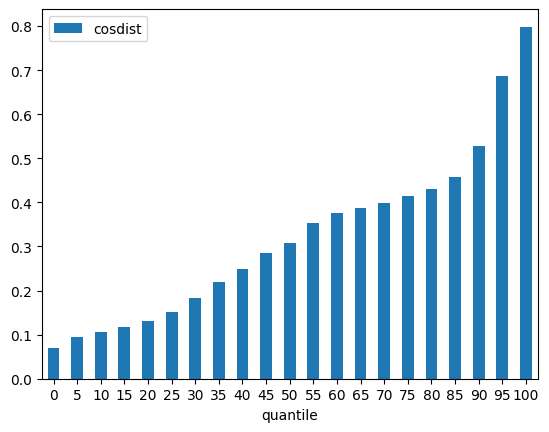

In [ ]:
quantiles_df.plot.bar(x='quantile', y=['cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/_scores/cos_quantiles.pdf", format="pdf")

### 5 RoCS-MT languages

In [ ]:
cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv")
cosine_distances_5 = cosine_distances_5[cosine_distances_5["src-tgt"]!="average"]
cosine_distances_5


FileNotFoundError: [Errno 2] No such file or directory: '/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/cosine_distance_matrix.csv'

In [ ]:
r_cosine_distances_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/cosine_distance_matrix.csv")
r_cosine_distances_5 = r_cosine_distances_5[r_cosine_distances_5["src-tgt"]!="average"]
r_cosine_distances_5

,Unnamed: 0,dataset,src-tgt,cosdist,nbex
0,0,rocsmt,raw.en-norm.en,0.130927,1922
1,1,rocsmt,ref.cs-norm.en,0.191921,1922
2,2,rocsmt,ref.de-norm.en,0.202451,1922
3,3,rocsmt,ref.fr-norm.en,0.193707,1922
4,4,rocsmt,ref.ru-norm.en,0.225688,1922
5,5,rocsmt,ref.uk-norm.en,0.187596,1922


In [ ]:
xsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/xsim_5/xsim_matrix.csv")
xsim_scores_5 = xsim_scores_5[xsim_scores_5["src-tgt"]!="average"]
xsim_scores_5

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,rocsmt,raw.en-norm.en,4.06,1922
1,1,rocsmt,ref.cs-norm.en,3.28,1922
2,2,rocsmt,ref.de-norm.en,0.83,1922
3,3,rocsmt,ref.fr-norm.en,4.68,1922
4,4,rocsmt,ref.ru-norm.en,5.93,1922
5,5,rocsmt,ref.uk-norm.en,2.39,1922


In [ ]:
rsim_scores_5 = pd.read_csv("/home/lnishimw/scratch/LASER/tasks/xsim/rsim_5/xsim_matrix.csv")
rsim_scores_5 = rsim_scores_5[rsim_scores_5["src-tgt"]!="average"]
rsim_scores_5

,Unnamed: 0,dataset,src-tgt,xsim,nbex
0,0,rocsmt,raw.en-norm.en,7.96,1922
1,1,rocsmt,ref.cs-norm.en,7.70,1922
2,2,rocsmt,ref.de-norm.en,8.48,1922
3,3,rocsmt,ref.fr-norm.en,8.64,1922
4,4,rocsmt,ref.ru-norm.en,10.98,1922
5,5,rocsmt,ref.uk-norm.en,5.93,1922


In [ ]:
df_rocsmt = pd.DataFrame()
df_rocsmt[['src-tgt', 'cosdist']] = cosine_distances_5[['src-tgt', 'cosdist']]
df_rocsmt['r-cosdist'] = r_cosine_distances_5['cosdist']
df_rocsmt['xsim'] = xsim_scores_5['xsim']
df_rocsmt['rsim'] = rsim_scores_5['xsim']
df_rocsmt['src'] = df_rocsmt['src-tgt'].apply(lambda x: x[:6])

In [ ]:
df_rocsmt.sort_values(by=['cosdist'])

,src-tgt,cosdist,r-cosdist,xsim,rsim,src
0,raw.en-norm.en,0.094007,0.130927,4.06,7.96,raw.en
2,ref.de-norm.en,0.111113,0.202451,0.83,8.48,ref.de
1,ref.cs-norm.en,0.149487,0.191921,3.28,7.70,ref.cs
5,ref.uk-norm.en,0.151771,0.187596,2.39,5.93,ref.uk
3,ref.fr-norm.en,0.160926,0.193707,4.68,8.64,ref.fr
4,ref.ru-norm.en,0.189940,0.225688,5.93,10.98,ref.ru


In [ ]:
df_rocsmt

,src-tgt,cosdist,r-cosdist,xsim,rsim,src
0,raw.en-norm.en,0.094007,0.130927,4.06,7.96,raw.en
1,ref.cs-norm.en,0.149487,0.191921,3.28,7.70,ref.cs
2,ref.de-norm.en,0.111113,0.202451,0.83,8.48,ref.de
3,ref.fr-norm.en,0.160926,0.193707,4.68,8.64,ref.fr
4,ref.ru-norm.en,0.189940,0.225688,5.93,10.98,ref.ru
5,ref.uk-norm.en,0.151771,0.187596,2.39,5.93,ref.uk


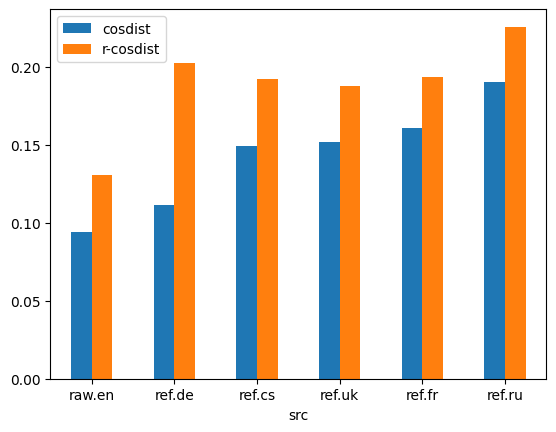

In [ ]:
df_rocsmt.sort_values(by=['cosdist']).plot.bar(x='src', y=['cosdist', 'r-cosdist'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/cosdist_rocsmt.pdf", format="pdf")

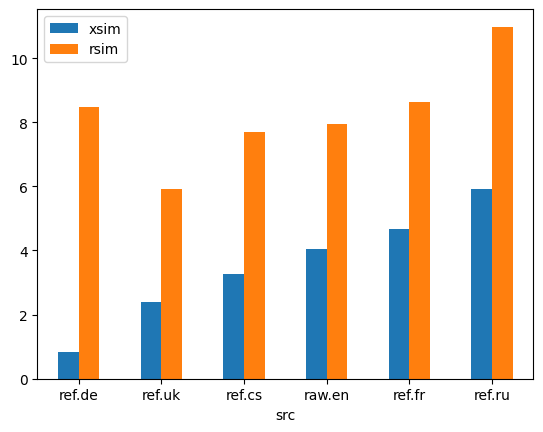

In [ ]:
df_rocsmt.sort_values(by=['xsim']).plot.bar(x='src', y=['xsim', 'rsim'], rot=0)
plt.savefig("/home/lnishimw/scratch/LASER/tasks/xsim_rocsmt.pdf", format="pdf")

### BUCC

In [ ]:
bucc = pd.DataFrame(columns=["lang-pair", "original", "no preprocessing"])

In [ ]:
bucc["lang-pair"] = [ "de-en", "fr-en", "ru-en", "zh-en" ]
bucc["original"] = [ 0.9921016005567153, 0.9838946364370093, 0.9762152176423046, 0.9770054414604177 ]
bucc["no preprocessing"] = [ 0.8336464857341683, 0.9450253136693815, 0.9560327906708231, 0.9366333157802351 ]

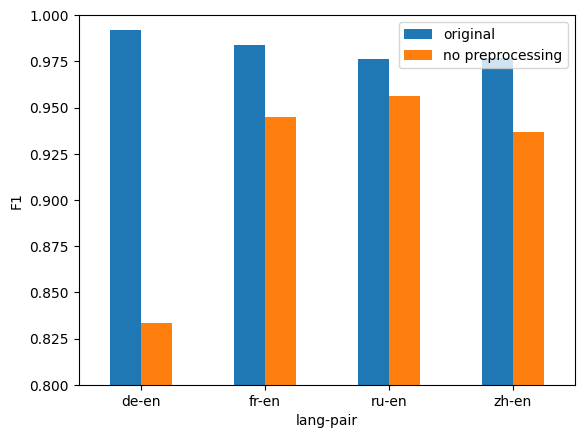

In [ ]:
bucc.plot.bar(x='lang-pair', y=['original', 'no preprocessing'], rot=0, ylim=(0.8, 1), ylabel="F1")
plt.savefig("/home/lnishimw/scratch/LASER/tasks/bucc_scores.pdf", format="pdf")

# Visualisation of embedding space

In [1]:
import os, json
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances, paired_cosine_distances
from scipy.stats import spearmanr

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-

In [2]:
def read_embeddings(input_file, dim=1024, normalized=True):
    X = np.fromfile(input_file, dtype=np.float32, count=-1)
    X = np.resize(X, (X.shape[0] // dim, dim))
    if normalized:
        X = normalize(X)
    return X


In [4]:
def get_visualization_dataframe(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=2, random_state=seed)
    umap = UMAP(n_components=2, init='random', random_state=seed)
    tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
    data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
    data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data


In [5]:
def get_visualization_dataframe_3D(src_file, ref_file, model, src_type="ugc", ref_type="std", seed=0):
    X_src = read_embeddings(src_file)
    X_ref = read_embeddings(ref_file)
    X = np.concatenate([X_ref, X_src])
    pca = PCA(n_components=3, random_state=seed)
    data = pd.DataFrame()
    data[["PCA dim 1", "PCA dim 2", "PCA dim 3"]] = pca.fit_transform(X)
    data["model"] = np.repeat([model], X.shape[0])
    data["type"] = np.repeat([ref_type, src_type], X_ref.shape[0])
    data["sentence"] = [ f"sent {i%X_ref.shape[0]}" for i in range(X.shape[0]) ]
    return X, data

In [6]:
flores_dev_leet = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc = "/home/lnishimw/scratch/experiments/robust_embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/flores200/100/dev/cleaned.eng_Latn.dev"
rocsmt_raw = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/raw.en.test"
rocsmt_norm = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/laser/rocsmt/test/norm.en.test"
multilexnorm_src = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/laser/multilexnorm2021/test/cleaned.en.ref.test"


In [7]:
flores_dev_leet_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/flores200/devtest/eng_Latn.devtest"
rocsmt_raw_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/rocsmt/test/raw.en.test"
rocsmt_norm_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/rocsmt/test/norm.en.test"
multilexnorm_src_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/embeddings/roberta-student-init/multilexnorm2021/en/test/en.ref.test"

In [8]:
flores_dev_leet_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_leet_Latn.dev"
flores_dev_ugc_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/flores200/100/dev/cleaned.eng_Latn_ugc.dev"
flores_dev_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/flores200/devtest/eng_Latn.devtest"
rocsmt_raw_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/rocsmt/test/raw.en.test"
rocsmt_norm_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/rocsmt/test/norm.en.test"
multilexnorm_src_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_025_lrec_xsim/embeddings/character-roberta-student/multilexnorm2021/test/cleaned.en.src.test"
multilexnorm_ref_c_roberta = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/multilexnorm2021/en/test/en.ref.test"

In [9]:
plots_path = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/plots"
os.makedirs(plots_path, exist_ok=True)

In [10]:
plt.figure(dpi=1200) 

<Figure size 7680x5760 with 0 Axes>

<Figure size 7680x5760 with 0 Axes>

In [12]:
src_file = rocsmt_raw
ref_file = rocsmt_norm
model="LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


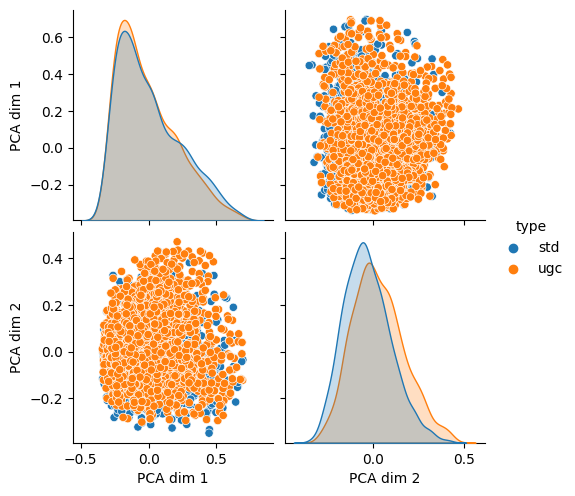

In [ ]:
sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
#plt.savefig(f"{plots_path}/pca_pairplot_{model}.png")

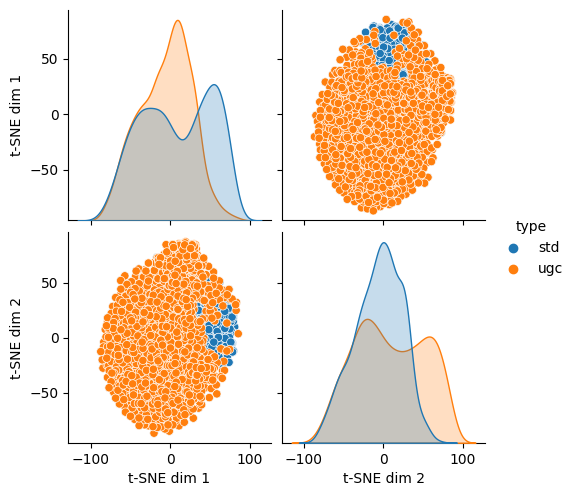

In [ ]:
sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/tsne_pairplot_{model}.png")

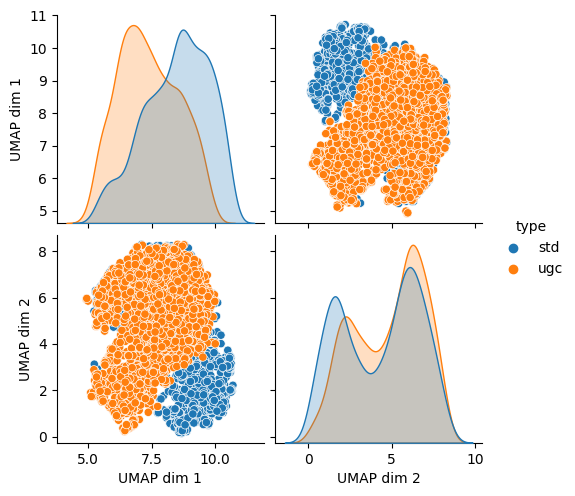

In [ ]:
sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
plt.savefig(f"{plots_path}/umap_pairplot_{model}.png")

## Qualitative analysis

In [11]:
def plot_circles(ax, data, dim_reduction="PCA"):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    laser_std_row = data.loc[((data['model'] == 'LASER') & (data['type'] == 'std'))]
    circle_center = laser_std_row[columns].to_numpy().flatten()
    for i, row in data.iterrows():
        point_b = row[columns].to_numpy()
        radius = paired_euclidean_distances(circle_center.reshape(1, -1), point_b.reshape(1, -1))[0]
        ax.add_patch(plt.Circle(circle_center, radius, alpha=0.2, color='xkcd:lightblue'))
    sns.scatterplot(data, x=columns[0], y=columns[1], hue="model", style="type", s=50, linewidth=0, ax=ax)

In [12]:
def plot_langs(ax, data, dim_reduction="PCA", x_offset=0, y_offset=0):
    if dim_reduction == "UMAP":
        columns = ["UMAP dim 1", "UMAP dim 2"]
    elif dim_reduction == "t-SNE":
        columns = ["t-SNE dim 1", "t-SNE dim 2"]
    else:
        columns = ["PCA dim 1", "PCA dim 2"]
    # sns.scatterplot(data, x=columns[0], y=columns[1], c="tab:purple", marker="s", linewidth=0, ax=ax)
    for _, row in data.iterrows():
        ax.text(row[columns[0]] + x_offset, row[columns[1]] + y_offset, row["lang"], c="tab:blue")

In [13]:
def distance_preservation_correlation(X1, data1, X2=None, data2=None):
    if X2 is None:
        X2 = X1
    if data2 is None:
        data2 = data1
    dist_orig = np.square(euclidean_distances(X1, X2)).flatten()
    dist_pca = np.square(euclidean_distances(data1[["PCA dim 1","PCA dim 2"]], data2[["PCA dim 1","PCA dim 2"]])).flatten()
    # dist_tsne = np.square(euclidean_distances(data1[["t-SNE dim 1","t-SNE dim 2"]], data2[["t-SNE dim 1","t-SNE dim 2"]])).flatten()
    # dist_umap = np.square(euclidean_distances(data1[["UMAP dim 1","UMAP dim 2"]], data2[["UMAP dim 1","UMAP dim 2"]])).flatten()
    print("PCA", spearmanr(dist_orig, dist_pca))
    # print("t-SNE", spearmanr(dist_orig, dist_tsne))
    # print("UMAP", spearmanr(dist_orig, dist_umap))


In [14]:
norm_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/norm.en.test.bin"
raw_en_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/raw.en.test.bin"
ref_cs_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.cs.test.bin"
ref_de_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.de.test.bin"
ref_fr_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.fr.test.bin"
ref_ru_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.ru.test.bin"
ref_uk_laser = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_027_lrec/embeddings/laser/rocsmt/test/ref.uk.test.bin"

### Std-UGC data

In [15]:
src_file = raw_en_laser
ref_file = norm_en_laser
model="LASER"
X_laser, laser_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [16]:
src_file = rocsmt_raw_roberta
ref_file = rocsmt_norm_roberta
model="RoLASER"
X_roberta, roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [17]:
src_file = rocsmt_raw_c_roberta
ref_file = rocsmt_norm_c_roberta
model="c-RoLASER"
X_c_roberta, c_roberta_data = get_visualization_dataframe(src_file, ref_file, model)

/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### Multilingual data

In [18]:
noisy_files = [
    {
        "file": raw_en_laser,
        "model": "LASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_raw_roberta,
        "model": "RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_roberta,
        "model": "RoLASER",
        "type": "std"
    },
    {
        "file": rocsmt_raw_c_roberta,
        "model": "c-RoLASER",
        "type": "ugc"
    },
    {
        "file": rocsmt_norm_c_roberta,
        "model": "c-RoLASER",
        "type": "std"
    }
]

In [19]:
multilingual_files = {
    "en": norm_en_laser,
    "cs": ref_cs_laser,
    "de": ref_de_laser,
    "fr": ref_fr_laser,
    "ru": ref_ru_laser,
    "uk": ref_uk_laser
}


In [20]:
seed = 0
X_multi_files = [ read_embeddings(file) for file in multilingual_files.values() ] 
X_noisy_files = [ read_embeddings(file["file"]) for file in noisy_files ]
X = np.concatenate(X_multi_files + X_noisy_files)

n_sentences =  X_multi_files[0].shape[0]

X_multi_models = np.repeat(["LASER"], n_sentences * len(X_multi_files))
X_noisy_models = np.repeat([file["model"] for file in noisy_files], n_sentences)

X_multi_langs = np.repeat(list(multilingual_files.keys()), n_sentences)
X_noisy_langs = np.repeat(["en"], n_sentences * len(X_noisy_files))

X_multi_types = np.repeat(["std"] + ["tra"]*(len(X_multi_files)-1), n_sentences)
X_noisy_types = np.repeat([file["type"] for file in noisy_files], n_sentences)

pca = PCA(n_components=2, random_state=seed)
# umap = UMAP(n_components=2, init='random', random_state=seed)
# tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=20, random_state=seed)

data = pd.DataFrame()
data[["PCA dim 1", "PCA dim 2"]] = pca.fit_transform(X)
# data[["t-SNE dim 1", "t-SNE dim 2"]] = tsne.fit_transform(X)
# data[["UMAP dim 1", "UMAP dim 2"]] = umap.fit_transform(X)
data["model"] = np.concatenate([X_multi_models, X_noisy_models])
data["lang"] = np.concatenate([X_multi_langs, X_noisy_langs])
data["type"] = np.concatenate([X_multi_types, X_noisy_types])
data["sentence"] = [ f"sent {i%n_sentences}" for i in range(X.shape[0]) ]


In [96]:
data[data["type"] == "tra"]

,PCA dim 1,PCA dim 2,model,lang,type,sentence
1922,-0.233864,0.044210,LASER,cs,tra,sent 0
1923,-0.139653,0.123606,LASER,cs,tra,sent 1
1924,0.266617,0.174287,LASER,cs,tra,sent 2
1925,-0.328834,0.166451,LASER,cs,tra,sent 3
1926,-0.337488,-0.144186,LASER,cs,tra,sent 4
...,...,...,...,...,...,...
11527,-0.015038,-0.177303,LASER,uk,tra,sent 1917
11528,-0.099755,0.057399,LASER,uk,tra,sent 1918
11529,-0.106330,-0.088803,LASER,uk,tra,sent 1919
11530,0.091215,0.167589,LASER,uk,tra,sent 1920


## Dimension reduction

In [21]:
examples = [
    {
        "id": 986,
        "ugc": "eye wud liek 2 aply 4 vilage idot",
        "std": "I would like to apply for village idiot.",
        "len": "mid1"
    },
    {
        "id": 760,
        "ugc": "But tmrw im no longer putting up with it.",
        "std": "But tomorrow I’m no longer putting up with it.",
        "len": "mid2"       
    },
    {
        "id": 1027,
        "ugc": 'im not a fan of rightwing stuff n was acctully de reason i stopd watching it 2 years ago tho the small fragrence of freedom was dät hard tu find amoung the 90% national-capitalism de site has tu offer, but anyhow i got d idea of a non censoring video site like liveleak but much more simple n less "newsy" dät any1 can post on no content wud b removed❤️',
        "std": "I’m not a fan of rightwing stuff and was actually the reason I stopped watching it 2 years ago, though the small fragrance of freedom was that hard to find among the 90% national-capitalism the site has to offer, but anyhow, I got the idea of a non-censoring video site like LiveLeak but much more simple and less “newsy” that anyone can post on. No content would be removed ❤️",
        "len": "long"
    },
    {
        "id": 1028,
        "ugc": "Hi guys",
        "std": "Hi guys.",
        "len": "short"
    },
    {
        "id": 128,
        "ugc": "I then lost interest in her bc her IG wasn't that interesting.",
        "std": "I then lost interest in her, because her Instagram wasn’t that interesting.",
        "len": "mid3"
    },
    {
        "id": 834,
        "ugc": "So they waked around school and they becam friends.",
        "std": "So they walked around school and they became friends.",
        "len": "mid4"
    },

]


In [22]:
n_ex = 4

In [23]:
subset = data[data["sentence"] == f"sent {examples[n_ex]['id']}"]

In [24]:
# sort subset by type in this order: std, ugc, tra
subset = subset.loc[subset["type"].map({"std": 1, "ugc": 2, "tra": 3}).sort_values().index]
subset

,PCA dim 1,PCA dim 2,model,lang,type,sentence
128,-0.057867,-0.123691,LASER,en,std,sent 128
15504,-0.072590,-0.134525,RoLASER,en,std,sent 128
19348,-0.017574,-0.144590,c-RoLASER,en,std,sent 128
11660,-0.078793,-0.046653,LASER,en,ugc,sent 128
13582,-0.071936,-0.124632,RoLASER,en,ugc,sent 128
17426,0.009738,-0.142462,c-RoLASER,en,ugc,sent 128
2050,-0.091138,-0.137584,LASER,cs,tra,sent 128
3972,-0.076081,-0.107370,LASER,de,tra,sent 128
5894,-0.098420,-0.112620,LASER,fr,tra,sent 128
7816,-0.103699,-0.047033,LASER,ru,tra,sent 128


In [25]:
subset_multi = subset[subset["type"] == "tra"]
subset_multi

,PCA dim 1,PCA dim 2,model,lang,type,sentence
2050,-0.091138,-0.137584,LASER,cs,tra,sent 128
3972,-0.076081,-0.107370,LASER,de,tra,sent 128
5894,-0.098420,-0.112620,LASER,fr,tra,sent 128
7816,-0.103699,-0.047033,LASER,ru,tra,sent 128
9738,-0.082194,-0.118329,LASER,uk,tra,sent 128


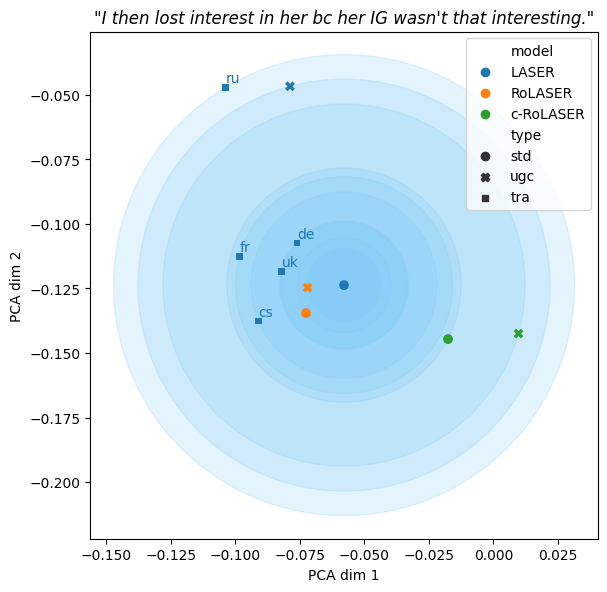

In [29]:
from textwrap import wrap
MAX_LEN = 80
fig, ax1 = plt.subplots(figsize=(6,6))
plot_circles(ax1, subset)
plot_langs(ax1, subset_multi, x_offset=0.0002, y_offset=0.002)
title_ugc = f'"{examples[n_ex]["ugc"][:MAX_LEN]}"'
title_std = f"{examples[n_ex]['std'][:MAX_LEN]}"
ax1.set_title(title_ugc, fontsize=12, loc='center', style='italic')
# set subtitle
#plt.suptitle(title_ugc, fontsize=12, y=0.99, x=0.55, style='italic')
ax1.set_aspect("equal")
ax1.legend(loc='upper right')
fig.tight_layout(pad=0.5)
plt.savefig(f"{plots_path}/pca_distances_{examples[n_ex]['len']}.pdf", format="pdf")



In [58]:
distance_preservation_correlation(X_laser, laser_data)

PCA SpearmanrResult(correlation=0.6989611352600602, pvalue=0.0)


In [59]:
distance_preservation_correlation(X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.6893637841903875, pvalue=0.0)


In [60]:
distance_preservation_correlation(X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.687845268565536, pvalue=0.0)


In [61]:
(0.6989611352600602 + 0.6893637841903875 + 0.687845268565536)/3

0.6920567293386611

In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_roberta, roberta_data)

PCA SpearmanrResult(correlation=0.38195282160472616, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3741878710283902, pvalue=0.0)
UMAP SpearmanrResult(correlation=0.007761505725226752, pvalue=1.4721199622448286e-204)


In [ ]:
distance_preservation_correlation(X_laser, laser_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4922625311122613, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.306934157077937, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.6122645614581149, pvalue=0.0)


In [ ]:
distance_preservation_correlation(X_roberta, roberta_data, X_c_roberta, c_roberta_data)

PCA SpearmanrResult(correlation=0.4892781155237972, pvalue=0.0)
t-SNE SpearmanrResult(correlation=0.3855124100397888, pvalue=0.0)
UMAP SpearmanrResult(correlation=-0.4066868847925667, pvalue=0.0)


### Cosine distances

In [25]:
X_laser.shape[0]//2

1922

In [26]:
n = X_laser.shape[0]//2
X_laser_std = X_laser[:n,:]
X_laser_ugc = X_laser[n:,:]
cos_dist_laser = paired_cosine_distances(X_laser_std, X_laser_ugc)

In [27]:
X_c_roberta_std = X_c_roberta[:n,:]
X_c_roberta_ugc = X_c_roberta[n:,:]
cos_dist_c_roberta = paired_cosine_distances(X_c_roberta_std, X_c_roberta_ugc)

In [28]:
X_roberta_std = X_roberta[:n,:]
X_roberta_ugc = X_roberta[n:,:]
cos_dist_roberta = paired_cosine_distances(X_roberta_std, X_roberta_ugc)

In [29]:
cos_dist_laser_roberta = paired_cosine_distances(X_laser_std, X_roberta_std)
cos_dist_laser_roberta_ugc = paired_cosine_distances(X_laser_std, X_roberta_ugc)
cos_dist_laser_c_roberta = paired_cosine_distances(X_laser_std, X_c_roberta_std)
cos_dist_laser_c_roberta_ugc = paired_cosine_distances(X_laser_std, X_c_roberta_ugc)

In [30]:
distances = pd.DataFrame()
distances["cos-laser"] = cos_dist_laser
distances["cos-roberta"] = cos_dist_roberta
distances["cos-c-roberta"] = cos_dist_c_roberta
distances["cos-laser-roberta"] = cos_dist_laser_roberta
distances["cos-laser-c-roberta"] = cos_dist_laser_c_roberta
distances["cos-laser-roberta-ugc"] = cos_dist_laser_roberta_ugc
distances["cos-laser-c-roberta-ugc"] = cos_dist_laser_c_roberta_ugc

In [31]:
distances.describe()

,cos-laser,cos-roberta,cos-c-roberta,cos-laser-roberta,cos-laser-c-roberta,cos-laser-roberta-ugc,cos-laser-c-roberta-ugc
count,1922.000000,1922.000000,1.922000e+03,1922.000000,1922.000000,1922.000000,1922.000000
mean,0.094007,0.064786,1.048355e-01,0.048574,0.129267,0.103932,0.176763
std,0.119788,0.090927,1.102463e-01,0.040280,0.095541,0.096561,0.118699
min,0.000000,0.000000,1.485082e-12,0.010895,0.020971,0.012217,0.024060
25%,0.015515,0.008281,2.944363e-02,0.022469,0.051056,0.042063,0.081678
50%,0.056402,0.035058,7.304738e-02,0.033976,0.098357,0.072336,0.149901
75%,0.117035,0.080964,1.407765e-01,0.060523,0.185140,0.127076,0.239733
max,0.795212,0.712171,7.797492e-01,0.455087,0.578313,0.744588,0.749812


In [70]:
distances[distances["cos-laser"]>=0.01].sort_values(by="cos-laser-roberta-ugc", ascending=True).head(20)

,cos-laser,cos-roberta,cos-c-roberta,cos-laser-roberta,cos-laser-c-roberta,cos-laser-roberta-ugc,cos-laser-c-roberta-ugc
380,0.017173,0.000890,0.034715,0.016317,0.022622,0.016907,0.052432
1632,0.016781,0.006904,0.008455,0.013778,0.031427,0.019758,0.033872
697,0.012207,0.008414,0.025695,0.014306,0.048234,0.020342,0.036740
638,0.024771,0.008115,0.050820,0.014548,0.047514,0.020523,0.050940
696,0.019605,0.003276,0.043132,0.018269,0.092839,0.021015,0.069163
918,0.011770,0.005076,0.034842,0.016574,0.051256,0.021077,0.078211
1412,0.052296,0.001198,0.025123,0.020544,0.053237,0.021133,0.065640
522,0.021670,0.010202,0.007085,0.012638,0.024808,0.022143,0.032594
444,0.034586,0.005252,0.009576,0.017770,0.034069,0.022531,0.043727
132,0.010466,0.007850,0.001865,0.016362,0.029397,0.022542,0.029937


In [221]:
# get the value at index 986
distances.loc[986]

cos    0.568843
Name: 986, dtype: float32

In [223]:
distances[(distances["cos"] >= 0.10) & (distances["cos"] <= 0.11)]

,cos
53,0.103117
63,0.105700
147,0.100668
213,0.101974
214,0.107443
219,0.102251
263,0.106156
272,0.104734
306,0.104031
314,0.108696


In [149]:
distances.describe()

,cos
count,1922.000000
mean,0.094007
std,0.119788
min,0.000000
25%,0.015515
50%,0.056402
75%,0.117035
max,0.795212


<AxesSubplot: ylabel='Density'>

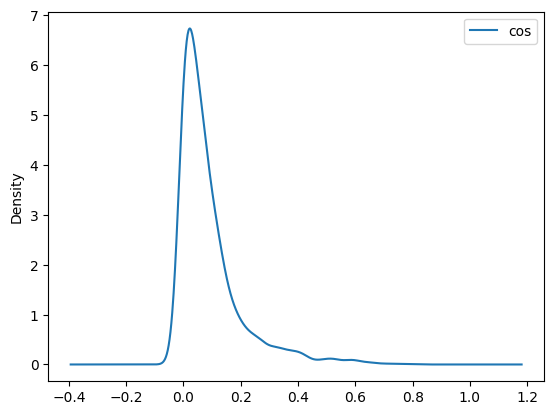

In [ ]:
distances.plot.density()

<AxesSubplot: ylabel='Frequency'>

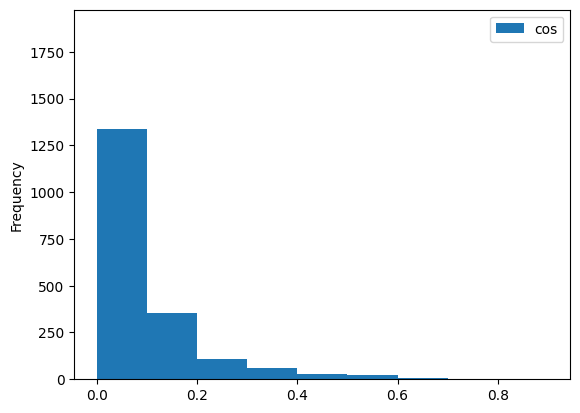

In [ ]:
distances.plot.hist(bins=[i/10 for i in range(10)], ylim=(0,1975))

In [ ]:
[i/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
distances[distances["cos"] == 0].size #/ distances.size

0.24720244150559512

## Student v. LASER on standard data

In [110]:
experiment_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz"
embeddings_dir = os.path.join(experiment_dir, "embeddings")
plots_dir = os.path.join(experiment_dir, "plots")
os.makedirs(plots_dir, exist_ok=True)
scores_dir = os.path.join(experiment_dir, "scores")
os.makedirs(scores_dir, exist_ok=True)

In [111]:
FILES = {
    "flores200" : {},
    "rocsmt" : {},
    "multilexnorm2021" : {},
}

In [112]:
CORPORA = list(FILES.keys())

In [113]:
MODEL_NAMES = {
    "laser" : "LASER",
    "roberta-student-init" : "RoLASER",
    "character-roberta-student-init" : "c-RoLASER",
}

In [114]:
MODELS = list(MODEL_NAMES.keys())

In [115]:
for model in MODELS:
    FILES["flores200"][model] = os.path.join(embeddings_dir, model, "flores200/devtest/eng_Latn.devtest")
    FILES["rocsmt"][model] = os.path.join(embeddings_dir, model, "rocsmt/test/norm.en.test")
    FILES["multilexnorm2021"][model] = os.path.join(embeddings_dir, model, "multilexnorm2021/en/test/en.ref.test")


In [116]:
FILES

{'flores200': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/laser/flores200/devtest/eng_Latn.devtest',
  'roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/roberta-student-init/flores200/devtest/eng_Latn.devtest',
  'character-roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/flores200/devtest/eng_Latn.devtest'},
 'rocsmt': {'laser': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/laser/rocsmt/test/norm.en.test',
  'roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/roberta-student-init/rocsmt/test/norm.en.test',
  'character-roberta-student-init': '/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_036_jz/embeddings/character-roberta-student-init/rocsmt/test/nor

In [117]:
def plot_visualization_data(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["t-SNE dim 1", "t-SNE dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/tsne_pairplot_std_{model_pair}.png")
    plt.clf()
    _ = sns.pairplot(data[["UMAP dim 1", "UMAP dim 2", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/umap_pairplot_std_{model_pair}.png")
    plt.close()

In [118]:
def plot_visualization_data_3D(data, plots_dir, model_pair):
    plt.clf()
    _ = sns.pairplot(data[["PCA dim 1", "PCA dim 2", "PCA dim 3", "type"]], hue="type")
    plt.savefig(f"{plots_dir}/pca3d_pairplot_std_{model_pair}.png")
    plt.clf()
    _, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    # tight_layout() adjusts the subplots to fit into the figure area.
    #plt.tight_layout()
    sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="type", palette="viridis", ax=axs[0])
    sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="type", palette="viridis", ax=axs[1])
    sns.scatterplot(data, x="PCA dim 3", y="seq_len", hue="type", palette="viridis", ax=axs[2])
    plt.savefig(f"{plots_dir}/pca3d_by_len_std_{model_pair}.png")
    plt.close()

In [119]:
def plot_cosine_distances(cosine_distances, plots_dir):
    # reset fig size to default
    plt.figure(figsize=(8,6))
    plt.clf()
    ax = sns.boxplot(cosine_distances, x="model", y="cos_dist")
    ax.set(ylim=(0,1))
    ax.set(xlabel='model pair', ylabel='pairwise cosine distance')
    plt.savefig(f"{plots_dir}/cos_dist_boxplot_std.png")
    plt.clf()
    sns.scatterplot(cosine_distances, x="len_diff", y="cos_dist", hue="model")
    plt.savefig(f"{plots_dir}/cos_dist_by_len_std.png")
    plt.close()


In [120]:
def write_json(data, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

In [121]:
from transformers import RobertaTokenizer, BertTokenizer
import sentencepiece as spm

SUPPORTED_TOKENIZERS = ["char", "roberta", "spm"]
SPM_MODEL_PATH = "/home/lnishimw/scratch/LASER/models/laser2.spm"

class CustomTokenizer():
    def __init__(self, tokenizer_name="spm"):
        self.tokenizer_name = tokenizer_name
        if tokenizer_name == "char":
            self.tokenizer_model = BertTokenizer.from_pretrained("bert-base-cased").basic_tokenizer
        elif tokenizer_name == "roberta":
            self.tokenizer_model = RobertaTokenizer.from_pretrained("roberta-base")
        elif tokenizer_name == "spm":
            self.tokenizer_model = spm.SentencePieceProcessor()
            self.tokenizer_model.load(SPM_MODEL_PATH)
        else:
            raise ValueError(f"The tokenizer {tokenizer_name} is unknown. Expected values are {SUPPORTED_TOKENIZERS}.")
    
    def tokenize(self, line):
        if self.tokenizer_name == "char":
            tokens = self.tokenizer_model.tokenize(line.strip())
            characters = [ " ".join(token) for token in tokens ]
            return " _EOW ".join(characters) + " _EOW"
        if self.tokenizer_name == "roberta":
            tokens = self.tokenizer_model.tokenize(line.strip())
            return " ".join(tokens)
        # SPM
        tokens = self.tokenizer_model.encode_as_pieces(line.strip())
        return " ".join(tokens)


In [122]:
# write TOKENIZERS dict with tokenizers
TOKENIZERS = {
    "character-roberta-student-init": CustomTokenizer("char"),
    "roberta-student-init": CustomTokenizer("roberta"),
    "laser": CustomTokenizer("spm")
}

In [123]:
RAW_FILES = {
    "flores200" : "/home/lnishimw/scratch/datasets/flores200/devtest/eng_Latn.devtest",
    "rocsmt" : "/home/lnishimw/scratch/datasets/rocsmt/test/norm.en.test",
    "multilexnorm2021" : "/home/lnishimw/scratch/datasets/multilexnorm2021/en/test/en.ref.test"
}

In [124]:
def file_seq_lengths(models, raw_file):
    tokenized_lines = []
    for model in models:
        tokenizer = TOKENIZERS[model]
        with open(raw_file, "r") as f:
            lines = f.readlines()
        tokenized_lines.extend([ tokenizer.tokenize(line) for line in lines ])
    sequence_lengths = np.array([ len(line.split()) for line in tokenized_lines ])
    
    return sequence_lengths


In [125]:
def compare_standard_embeddings(corpus, model_names=MODEL_NAMES, all_files=FILES):
    files = all_files[corpus]
    cos_dist = {}
    len_diff = {}
    sentence = {}
    models = list(model_names.keys())
    plots_path = os.path.join(plots_dir, corpus)
    os.makedirs(plots_path, exist_ok=True)
    for model in models[1:]:
        print("Comparing LASER with", model_names[model])
        ref_file = files["laser"]
        src_file = files[model]
        model_pair = f"{model_names[model]}_LASER"
        X, data = get_visualization_dataframe_3D(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
        seq_lengths = file_seq_lengths(["laser", model], RAW_FILES[corpus])
        n_sentences = X.shape[0]//2
        cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
        src_len, ref_len = seq_lengths[n_sentences:], seq_lengths[:n_sentences]
        len_diff[model_pair] = np.abs(src_len - ref_len)
        sentence[model_pair] = [f"sent {i}" for i in range(n_sentences)]
        data["seq_len"] = seq_lengths
        plot_visualization_data_3D(data, plots_path, model_pair)
    print("Concatenating results")
    cosine_distances = pd.DataFrame(columns=["cos_dist", "model", "len_diff", "sentence"])
    cosine_distances["cos_dist"] = np.concatenate(list(cos_dist.values()))
    cosine_distances["len_diff"] = np.concatenate(list(len_diff.values()))
    cosine_distances["sentence"] = np.concatenate(list(sentence.values()))
    cosine_distances["model"] = np.repeat(list(cos_dist.keys()), n_sentences)
    plot_cosine_distances(cosine_distances, plots_path)
    cos_dist_avg = { model : cos_dist[model].mean(dtype=np.float64) for model in cos_dist }
    print("Average cost dist", cos_dist_avg)
    write_json(cos_dist_avg, os.path.join(scores_dir, f"{corpus}_avg_cos_dist.json"))
    return data, cosine_distances



### FLORES

In [127]:
corpus = "flores200"
data_flores, cos_dist_flores = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.020654403924824222, 'c-RoLASER_LASER': 0.04798336457939664}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

### RoCS-MT

In [90]:
corpus = "rocsmt"
data_rocsmt, cos_dist_rocsmt = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.04857374348073934, 'c-RoLASER_LASER': 0.12926651418604476}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

In [128]:
cos_dist_rocsmt[cos_dist_rocsmt["sentence"] == "sent 199"]

,cos_dist,model,len_diff,sentence
199,0.187439,RoLASER_LASER,1,sent 199
2121,0.507936,c-RoLASER_LASER,4,sent 199


In [129]:
# cost dist rows with len_diff < 10 and model == "c-RoLASER_LASER"
cos_dist_rocsmt[(cos_dist_rocsmt["len_diff"] < 5) & (cos_dist_rocsmt["model"] == "c-RoLASER_LASER")]


,cos_dist,model,len_diff,sentence
1956,0.431964,c-RoLASER_LASER,4,sent 34
2121,0.507936,c-RoLASER_LASER,4,sent 199
2268,0.380190,c-RoLASER_LASER,3,sent 346
2357,0.461719,c-RoLASER_LASER,3,sent 435
2399,0.484136,c-RoLASER_LASER,4,sent 477
2554,0.344658,c-RoLASER_LASER,3,sent 632
2692,0.502456,c-RoLASER_LASER,4,sent 770
2828,0.396937,c-RoLASER_LASER,4,sent 906
2830,0.396937,c-RoLASER_LASER,4,sent 908
3292,0.532893,c-RoLASER_LASER,4,sent 1370


In [130]:
cos_dist_rocsmt[cos_dist_rocsmt["len_diff"] >= 250]

,cos_dist,model,len_diff,sentence
1926,0.030069,c-RoLASER_LASER,266,sent 4
1978,0.035099,c-RoLASER_LASER,250,sent 56
2053,0.034168,c-RoLASER_LASER,257,sent 131
2947,0.022442,c-RoLASER_LASER,255,sent 1025
2949,0.025447,c-RoLASER_LASER,283,sent 1027
3123,0.032745,c-RoLASER_LASER,283,sent 1201


In [131]:
rolaser_diff = cos_dist_rocsmt[cos_dist_rocsmt["model"] == "RoLASER_LASER"]
c_rolaser_diff = cos_dist_rocsmt[cos_dist_rocsmt["model"] == "c-RoLASER_LASER"]

<AxesSubplot: xlabel='len_diff', ylabel='cos_dist'>

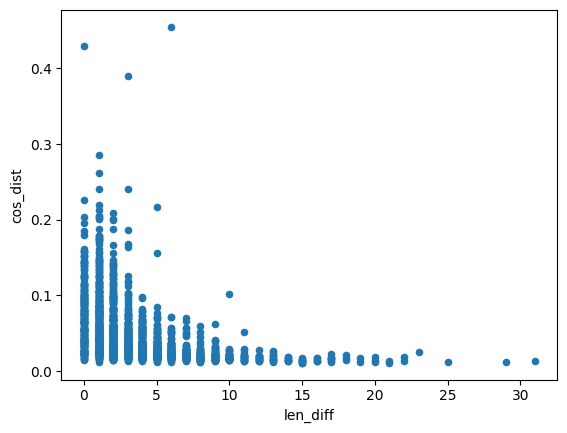

In [132]:
rolaser_diff.plot.scatter(x="len_diff", y="cos_dist")

<AxesSubplot: xlabel='len_diff', ylabel='cos_dist'>

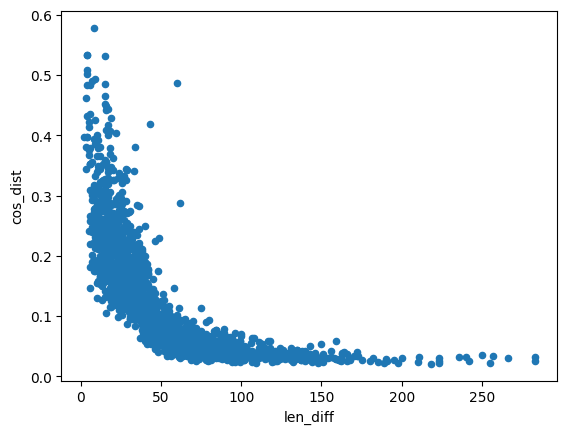

In [133]:
c_rolaser_diff.plot.scatter(x="len_diff", y="cos_dist")

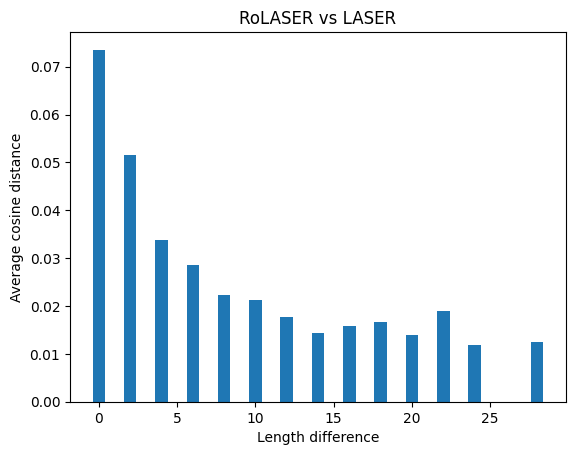

In [134]:
# plot moving average cosine distance by bins of length difference

rolaser_avg_cos_dist = {}
for bin in range(0, 30, 2):
    rolaser_avg_cos_dist[bin] = rolaser_diff[(rolaser_diff["len_diff"] >= bin) & (rolaser_diff["len_diff"] < bin+2)]["cos_dist"].mean()

plt.bar(rolaser_avg_cos_dist.keys(), rolaser_avg_cos_dist.values())
plt.xlabel("Length difference")
plt.ylabel("Average cosine distance")
plt.title("RoLASER vs LASER")
plt.savefig(f"{plots_dir}/rolaser_avg_cos_dist_by_len_diff.png")

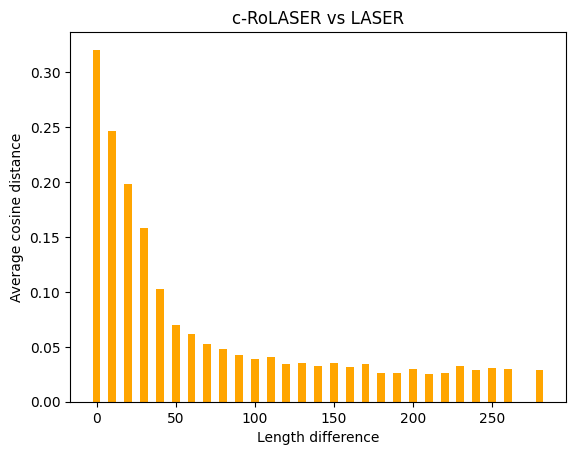

In [135]:
c_rolaser_avg_cos_dist = {}
for bin in range(0, 300, 10):
    c_rolaser_avg_cos_dist[bin] = c_rolaser_diff[(c_rolaser_diff["len_diff"] >= bin) & (c_rolaser_diff["len_diff"] < bin+10)]["cos_dist"].mean()

plt.bar(c_rolaser_avg_cos_dist.keys(), c_rolaser_avg_cos_dist.values(), color="orange", width=5)
plt.xlabel("Length difference")
plt.ylabel("Average cosine distance")
plt.title("c-RoLASER vs LASER")
plt.savefig(f"{plots_dir}/c_rolaser_avg_cos_dist_by_len_diff.png")

### MultiLexNorm

In [136]:
corpus = "multilexnorm2021"
data_mulilexnorm, cos_dist_multilexnorm = compare_standard_embeddings(corpus)

Comparing LASER with RoLASER
Comparing LASER with c-RoLASER
Concatenating results
Average cost dist {'RoLASER_LASER': 0.04163903945485953, 'c-RoLASER_LASER': 0.09462301293695767}


<Figure size 640x480 with 0 Axes>

<Figure size 862.25x750 with 0 Axes>

<Figure size 874.75x750 with 0 Axes>

## Difference between std-gold and ugc-gold loss. 

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

LOSSES = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((-4, 4))  # Set the exponent range to (5, 5)

In [254]:
all_scores = pd.read_csv("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/all_scores.csv").sort_values(by="steps")

Plotting separate loss curves for each model...


<Figure size 640x480 with 0 Axes>

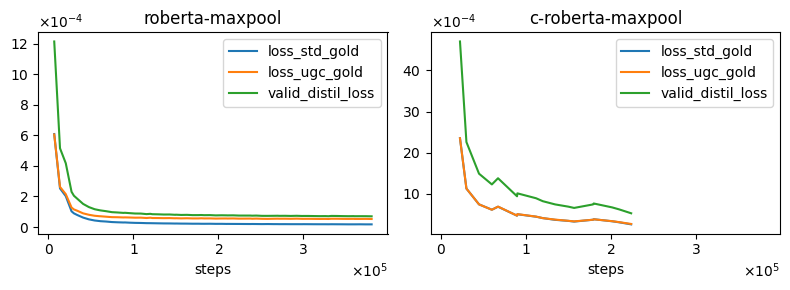

In [257]:
plt.clf()
models = all_scores["model"].unique()
n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

print("Plotting separate loss curves for each model...")
for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=LOSSES, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()

In [236]:
rolaser = all_scores[all_scores['model'] == 'roberta-maxpool']
c_rolaser = all_scores[all_scores['model'] == 'c-roberta-maxpool']

In [237]:
rolaser_diff = rolaser['loss_ugc_gold'] - rolaser['loss_std_gold']
c_rolaser_diff = c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold']

In [239]:
c_rolaser.describe()

,Unnamed: 0.1,epoch,steps,loss_std_gold,loss_ugc_gold,valid_distil_loss,Unnamed: 0
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,79.000000,6.000000,128784.736842,0.000562,0.000564,0.001126,9.000000
std,5.627314,2.924988,65418.832930,0.000482,0.000481,0.000963,5.627314
min,70.000000,1.000000,22414.000000,0.000260,0.000269,0.000529,0.000000
25%,74.500000,3.500000,78449.000000,0.000340,0.000342,0.000681,4.500000
50%,79.000000,6.000000,134484.000000,0.000385,0.000382,0.000767,9.000000
75%,83.500000,8.500000,179656.000000,0.000561,0.000561,0.001122,13.500000
max,88.000000,10.000000,224140.000000,0.002352,0.002352,0.004704,18.000000


In [258]:
c_rolaser[c_rolaser['loss_ugc_gold'] - c_rolaser['loss_std_gold'] > 0.000001].describe()

,Unnamed: 0.1,epoch,steps,loss_std_gold,loss_ugc_gold,valid_distil_loss,Unnamed: 0
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,78.500000,6.916667,150863.000000,0.000388,0.000392,0.000781,8.500000
std,5.518564,2.429303,54836.467219,0.000122,0.000121,0.000243,5.518564
min,71.000000,3.000000,67242.000000,0.000260,0.000269,0.000529,1.000000
25%,74.500000,5.000000,106552.500000,0.000323,0.000327,0.000650,4.500000
50%,78.000000,7.000000,150000.000000,0.000344,0.000346,0.000690,8.000000
75%,81.750000,9.250000,203794.500000,0.000452,0.000454,0.000906,11.750000
max,88.000000,10.000000,224140.000000,0.000689,0.000692,0.001380,18.000000


In [245]:
c_rolaser_diff.describe(percentiles=[x/100 for x in range(0,101,5)])

count    1.900000e+01
mean     2.392232e-06
std      3.364164e-06
min     -2.214780e-06
0%      -2.214780e-06
5%      -1.635918e-06
10%     -6.638480e-07
15%     -2.134630e-07
20%     -9.346000e-08
25%     -4.045000e-08
30%      5.127600e-08
35%      5.247930e-07
40%      1.458648e-06
45%      1.542840e-06
50%      1.542840e-06
55%      2.220351e-06
60%      2.323158e-06
65%      2.720073e-06
70%      2.953842e-06
75%      3.743405e-06
80%      4.632600e-06
85%      5.089275e-06
90%      6.492402e-06
95%      9.859170e-06
100%     9.859170e-06
max      9.859170e-06
dtype: float64

In [259]:
# Format the y-axis labels
def format_yaxis(value, _):
    if value >= 1000:
        return f"{value / 1000:.0f}k"
    else:
        return int(value)

In [81]:
rolaser_diff.plot.density(label="RoLASER")
c_rolaser_diff.plot.density(label="c-RoLASER")
# add x axis label  
plt.xlabel('Difference in loss (loss_ugc_gold - loss_std_gold)')
# apply formatter to y axis to display thousands as K
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis))
# add legend
plt.legend()
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores/loss_diff_density.pdf") 

NameError: name 'rolaser_diff' is not defined

### Correlation with sequence length

In [20]:
char_tokenizer = CustomTokenizer("char")
roberta_tokenizer = CustomTokenizer("roberta") 
spm_tokenizer = CustomTokenizer("spm")

In [21]:
ref_file = FILES["rocsmt"]["laser"] 
src_file = FILES["rocsmt"]["roberta-student"]

In [22]:
src_training_file = "/home/lnishimw/scratch/datasets/oscar/mini/4Mlrec/en_2_chunks/ugc/0/en_2-0_mix_all.txt"

In [23]:
# read each line of ref_file and save tokenized lines to dataframe 
def read_tokenized_lines(file, tokenizer):
    with open(file) as f:
        tok_lines = []
        seq_lengths = []
        for line in f:
            tok_line = tokenizer.tokenize(line)
            tok_lines.append(tok_line)
            seq_lengths.append(len(tok_line.split()))
    data = pd.DataFrame(tok_lines, columns=["tokens"])
    data["seq_len"] = seq_lengths
    return data

In [71]:
src_lines_char = read_tokenized_lines(src_training_file, char_tokenizer)
src_lines_char

,tokens,seq_len
0,W h y _EOW i t _EOW ’ _EOW s _EOW g r e a t _E...,284
1,H o w _EOW t o _EOW e m u l a t e _EOW i t _EO...,367
2,T h e _EOW C o o p e r _EOW R e v i e 3 _EOW i...,528
3,W h y _EOW i t _EOW ’ _EOW s _EOW g r e a t _E...,348
4,H o w _EOW t o _EOW e m u l a t e _EOW i t _EO...,284
...,...,...
19995,S H O R T _EOW S A L E _EOW A P P R O V E D _E...,521
19996,"A s c e n t _EOW , _EOW A s c e n t _EOW P r o...",113
19997,A s c e n _EOW t _EOW R e a l _EOW E s t a t e...,156
19998,H a v i n g _EOW h a d _EOW m y _EOW B e r l i...,124


In [46]:
src_lines_char["seq_len"].describe()

count    20000.000000
mean       307.614850
std        409.380669
min          2.000000
25%        157.000000
50%        230.000000
75%        359.000000
max      43833.000000
Name: seq_len, dtype: float64

In [48]:
# plot percentiles of sequence lengths
percentiles = [x/100 for x in range(0,101,5)]
src_lines_char["seq_len"].describe(percentiles=percentiles)

count    20000.000000
mean       307.614850
std        409.380669
min          2.000000
0%           2.000000
5%         113.000000
10%        123.000000
15%        134.000000
20%        145.000000
25%        157.000000
30%        170.000000
35%        183.000000
40%        197.000000
45%        213.000000
50%        230.000000
55%        250.000000
60%        270.000000
65%        295.000000
70%        325.000000
75%        359.000000
80%        401.000000
85%        466.000000
90%        557.000000
95%        737.000000
100%     43833.000000
max      43833.000000
Name: seq_len, dtype: float64

In [72]:
src_lines_roberta = read_tokenized_lines(src_training_file, roberta_tokenizer)
src_lines_roberta

,tokens,seq_len
0,Why Ġit âĢ Ļ s Ġgreat : ĠThe Ġarticle Ġhas Ġa ...,59
1,How Ġto Ġemulate Ġit : ĠFind Ġa Ġtopic Ġyou Ġk...,83
2,The ĠCooper ĠRev ie 3 Ġis Ġa Ġfantastic Ġs 0 u...,150
3,"Why Ġit âĢ Ļ s Ġgreat : ĠThe Ġheadline , Ġno Ġ...",99
4,How Ġto Ġemulate Ġit : ĠIs Ġthere Ġsomething Ġ...,64
...,...,...
19995,SH ORT ĠS ALE ĠAP PROV ED ! ĠBack Ġon Ġmarket ...,128
19996,"As cent Ġ, ĠAs cent ĠProperty ĠManagement Ġ, Ġ...",22
19997,A sc en Ġt ĠReal ĠEstate Ġand Ġthe ĠAs cent Re...,32
19998,Having Ġhad Ġmy ĠBer ling o Ġfor Ġ5 Ġyears Ġ& ...,29


In [55]:
src_lines_roberta["seq_len"].describe(percentiles=percentiles)

count    20000.00000
mean        70.34555
std        109.56024
min          1.00000
0%           1.00000
5%          24.00000
10%         27.00000
15%         30.00000
20%         33.00000
25%         36.00000
30%         38.00000
35%         41.00000
40%         45.00000
45%         48.00000
50%         52.00000
55%         56.00000
60%         61.00000
65%         67.00000
70%         74.00000
75%         82.00000
80%         92.00000
85%        106.00000
90%        128.00000
95%        170.00000
100%     12601.00000
max      12601.00000
Name: seq_len, dtype: float64

In [73]:
src_lines_spm = read_tokenized_lines(src_training_file, spm_tokenizer)
src_lines_spm

,tokens,seq_len
0,▁W hy ▁it ’ s ▁great : ▁The ▁article ▁has ▁a ▁...,73
1,▁How ▁to ▁e mula te ▁it : ▁Fin d ▁a ▁to pic ▁y...,108
2,▁The ▁Co o per ▁Re vie 3 ▁is ▁a ▁fantast ic ▁s...,176
3,"▁W hy ▁it ’ s ▁great : ▁The ▁head line , ▁no ▁...",109
4,▁How ▁to ▁e mula te ▁it : ▁Is ▁there ▁somethin...,76
...,...,...
19995,▁S HO RT ▁S ALE ▁ APP RO VE D ! ▁Ba ck ▁on ▁ma...,169
19996,"▁As cent ▁ , ▁As cent ▁Pro per ty ▁Management ...",33
19997,▁As cen ▁t ▁Real ▁Esta te ▁and ▁the ▁As cent R...,42
19998,▁Ha ving ▁had ▁my ▁Berlin go ▁for ▁5 ▁years ▁&...,38


In [57]:
src_lines_spm["seq_len"].describe(percentiles=percentiles)

count    20000.000000
mean        93.418100
std        133.427285
min          2.000000
0%           2.000000
5%          33.000000
10%         37.000000
15%         41.000000
20%         44.000000
25%         48.000000
30%         51.000000
35%         56.000000
40%         60.000000
45%         64.000000
50%         69.000000
55%         75.000000
60%         82.000000
65%         89.000000
70%         98.000000
75%        108.000000
80%        122.000000
85%        141.000000
90%        169.000000
95%        224.000000
100%     14824.000000
max      14824.000000
Name: seq_len, dtype: float64

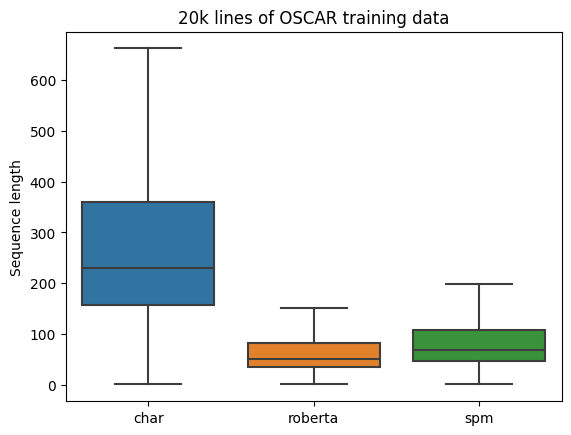

In [74]:
# plot boxplot of sequence length without outliers
sns.boxplot([src_lines_char["seq_len"], src_lines_roberta["seq_len"], src_lines_spm["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks([0,1,2], ["char", "roberta", "spm"])
plt.title("20k lines of OSCAR training data")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/oscar_seq_len_boxplot.png")

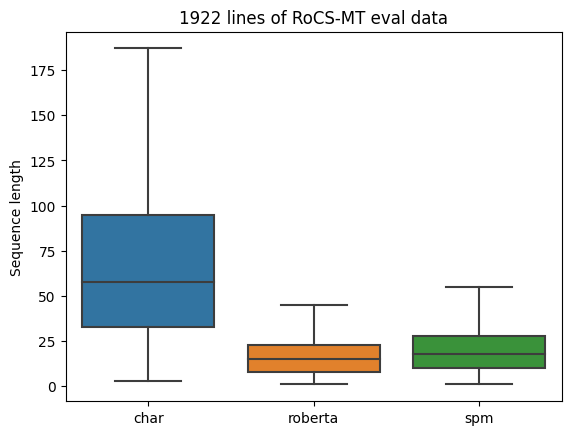

In [66]:
src_eval_file = "/home/lnishimw/scratch/datasets/rocsmt/test/raw.en.test"
src_lines_char_eval = read_tokenized_lines(src_eval_file, char_tokenizer)
src_lines_roberta_eval = read_tokenized_lines(src_eval_file, roberta_tokenizer)
src_lines_spm_eval = read_tokenized_lines(src_eval_file, spm_tokenizer)

sns.boxplot([src_lines_char_eval["seq_len"], src_lines_roberta_eval["seq_len"], src_lines_spm_eval["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks([0,1,2], ["char", "roberta", "spm"])
plt.title("1922 lines of RoCS-MT eval data")
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/rocsmt_seq_len_boxplot.png")

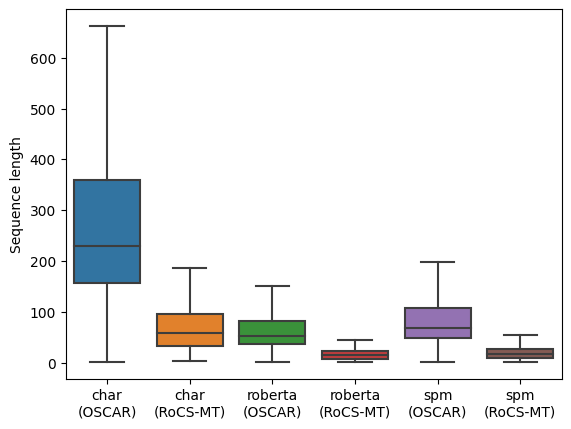

In [80]:
sns.boxplot([src_lines_char["seq_len"], src_lines_char_eval["seq_len"], src_lines_roberta["seq_len"], src_lines_roberta_eval["seq_len"], src_lines_spm["seq_len"], src_lines_spm_eval["seq_len"]], showfliers=False)
plt.ylabel("Sequence length")
plt.xticks(range(6), ["char\n(OSCAR)", "char\n(RoCS-MT)", "roberta\n(OSCAR)", "roberta\n(RoCS-MT)", "spm\n(OSCAR)", "spm\n(RoCS-MT)"])
plt.savefig("/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_035_jz/plots/oscar_rocsmt_seq_len_boxplot.png")

In [30]:
tok_files_dataframe(char_tokenizer)

NameError: name 'tok_files_dataframe' is not defined

In [29]:
tok_files_dataframe(roberta_tokenizer)

,tokenized line,corpus,sequence length
0,""" We Ġnow Ġhave Ġ4 - month - old Ġmice Ġthat Ġ...",flores200,25
1,"Dr . ĠEh ud ĠUr , Ġprofessor Ġof Ġmedicine Ġat...",flores200,44
2,"Like Ġsome Ġother Ġexperts , Ġhe Ġis Ġskeptica...",flores200,31
3,"On ĠMonday , ĠSara ĠDani us , Ġpermanent Ġsecr...",flores200,60
4,"D ani us Ġsaid , Ġ"" Right Ġnow Ġwe Ġare Ġdoing...",flores200,37
...,...,...,...
4896,rt Ġ@ tw itt bet ty butt Ġ: Ġno Ġrelationship ...,multilexnorm2021,37
4897,is Ġj ae jo ong Ġreally Ġchange Ġhis Ġchar a Ġ...,multilexnorm2021,16
4898,rt Ġ@ ton y the t urtle ee Ġ: Ġover Ġhere Ġtry...,multilexnorm2021,35
4899,rt Ġ@ mi il kk k Ġ: Ġwhen Ġm r . Ġk r abs Ġsol...,multilexnorm2021,32


In [30]:
tok_files_dataframe(spm_tokenizer)

,tokenized line,corpus,sequence length
0,"▁"" W e ▁now ▁have ▁4- mon th - old ▁mi ce ▁tha...",flores200,32
1,"▁Dr . ▁Eh ud ▁Ur , ▁professor ▁of ▁medic ine ▁...",flores200,63
2,"▁Li ke ▁some ▁other ▁expert s , ▁he ▁is ▁ ske ...",flores200,48
3,"▁On ▁Mon day , ▁Sara ▁Dan ius , ▁permanent ▁se...",flores200,92
4,"▁Dan ius ▁said , ▁"" R ight ▁now ▁we ▁are ▁do i...",flores200,50
...,...,...,...
4896,▁ rt ▁@ t wit t bet ty but t ▁: ▁no ▁relation ...,multilexnorm2021,43
4897,▁is ▁ja ejo ong ▁really ▁change ▁his ▁char a ▁...,multilexnorm2021,15
4898,▁ rt ▁@ to ny the tur tle e e ▁: ▁over ▁here ▁...,multilexnorm2021,43
4899,▁ rt ▁@ mi il k kk ▁: ▁when ▁m r . ▁kra b s ▁s...,multilexnorm2021,43


In [87]:
cos_dist = {}
corpus = "rocsmt"
files = FILES[corpus]
model_names = MODEL_NAMES
model = "character-roberta-student"
print("Comparing LASER with", model_names[model])
ref_file = files["laser"]
src_file = files[model]
model_pair = f"{model_names[model]}_LASER"
X, data = get_visualization_dataframe(src_file, ref_file, model_pair, src_type=model_names[model], ref_type="LASER")
data["seq_len"] = file_seq_lengths(["laser", model], RAW_FILES[corpus])
n_sentences = X.shape[0]//2
cos_dist[model_pair] = paired_cosine_distances(X[:n_sentences,:], X[n_sentences:,:])
plot_visualization_data(data, plots_path, model_pair)

Comparing LASER with c-RoLASER


/scratch/lnishimw/miniconda3/envs/pt_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

<Figure size 624.75x500 with 0 Axes>

In [144]:
data.describe()

,PCA dim 1,PCA dim 2,t-SNE dim 1,t-SNE dim 2,UMAP dim 1,UMAP dim 2,seq_len
count,3.844000e+03,3.844000e+03,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,2.381705e-08,1.151157e-07,0.728627,0.971634,7.872536,10.206622,49.213840
std,3.084261e-01,2.016001e-01,39.621719,37.784554,2.046288,1.615906,48.339641
min,-3.868888e-01,-3.007285e-01,-87.784462,-86.717583,4.146110,5.976264,1.000000
25%,-2.370180e-01,-1.576683e-01,-29.493250,-27.736765,6.231793,9.280321,17.000000
50%,-1.334030e-01,-4.316083e-02,-0.479358,0.288037,7.623292,10.347948,32.000000
75%,1.870254e-01,1.001430e-01,29.434695,28.843257,9.261320,11.347516,65.000000
max,8.369790e-01,7.325433e-01,92.460991,81.353401,12.207938,13.408525,399.000000


<AxesSubplot: xlabel='PCA dim 1', ylabel='PCA dim 2'>

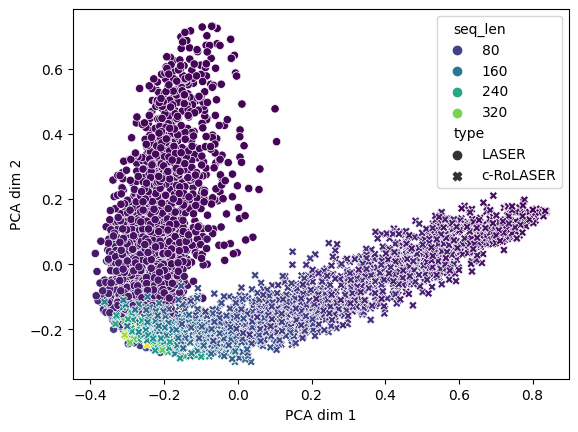

In [110]:
sns.scatterplot(data, x="PCA dim 1", y="PCA dim 2", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 2', ylabel='seq_len'>

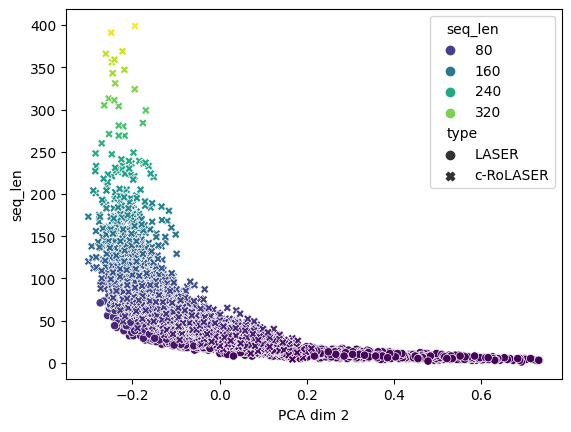

In [111]:
sns.scatterplot(data, x="PCA dim 2", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='PCA dim 1', ylabel='seq_len'>

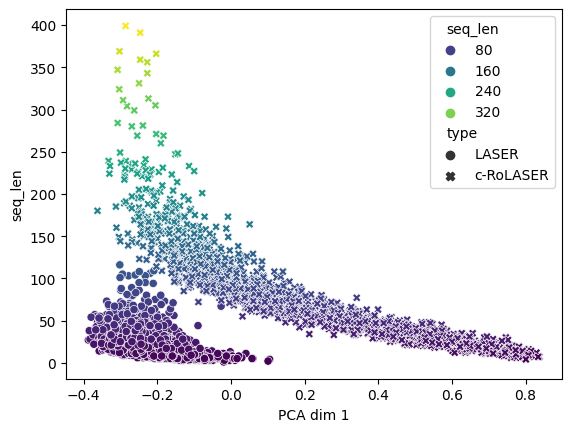

In [112]:
sns.scatterplot(data, x="PCA dim 1", y="seq_len", hue="seq_len", style="type", palette="viridis")

<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 1'>

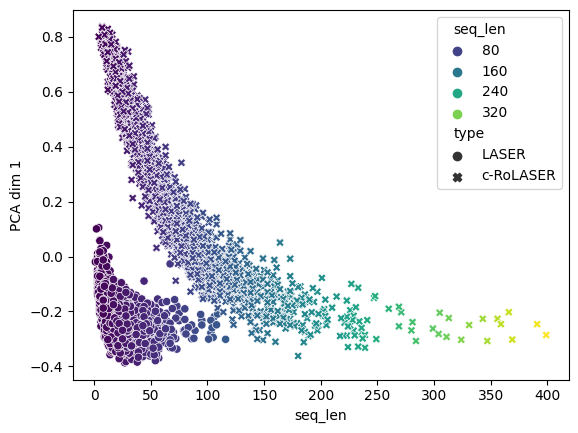

In [114]:
sns.scatterplot(data, y="PCA dim 1", x="seq_len", hue="seq_len", style="type", palette="viridis")

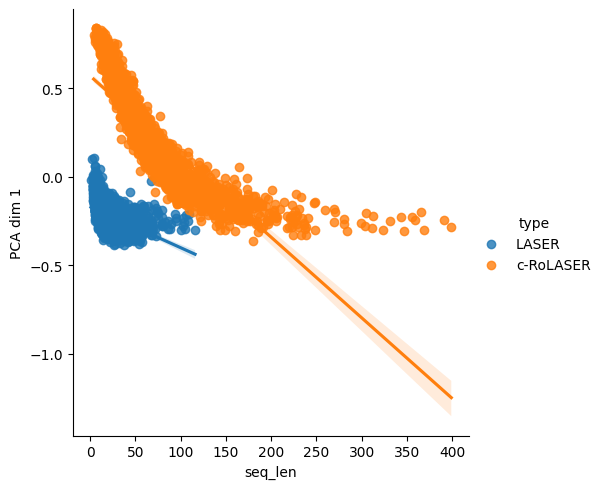

In [139]:
sns.lmplot(data=data, y="PCA dim 1", x="seq_len", hue="type")


<AxesSubplot: xlabel='seq_len', ylabel='PCA dim 2'>

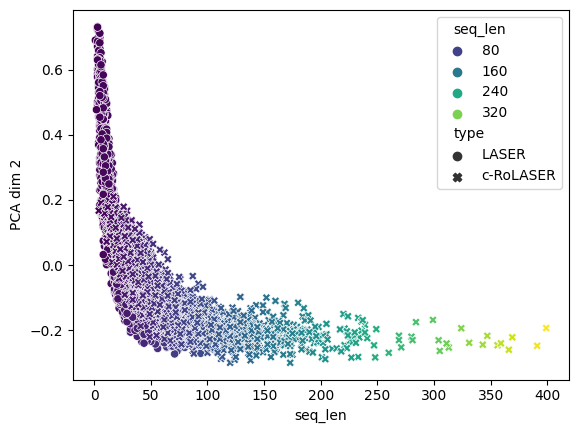

In [113]:
sns.scatterplot(data, y="PCA dim 2", x="seq_len", hue="seq_len", style="type", palette="viridis")

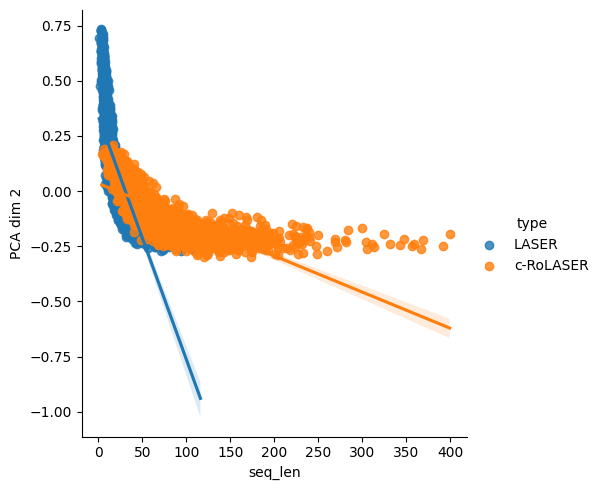

In [150]:
sns.lmplot(data=data, y="PCA dim 2", x="seq_len", hue="type")
